In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 2) With Facebook Likes

In [4]:
classification2_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'actor_2_name',
       'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'imdb_score',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'movie_facebook_likes'])

In [5]:
classification2_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,...,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio
0,123.0,446.0,821.0,20000.0,22209,1.0,English,USA,PG-13,48000000.0,...,0,0,1,0,1,0,0,0,0,0.981155
1,88.0,104.0,318.0,628.0,2726,0.0,English,USA,PG,3500000.0,...,0,0,0,0,0,0,0,0,0,23.828571
2,104.0,116.0,83.0,1000.0,1662,0.0,English,USA,R,4500000.0,...,0,1,1,0,0,0,1,0,0,13.078468
3,148.0,644.0,326.0,1000.0,2566,1.0,English,USA,R,27000000.0,...,1,0,0,0,0,0,1,0,1,2.007407
4,98.0,11000.0,484.0,13000.0,14921,3.0,English,USA,R,6000000.0,...,0,0,0,0,0,0,0,0,1,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,89.0,190.0,17000.0,17860,0.0,English,USA,R,35000000.0,...,0,0,0,0,0,0,0,0,0,1.579766
3848,100.0,24.0,851.0,15000.0,18786,9.0,English,USA,R,20000000.0,...,0,0,0,0,0,0,0,0,0,2.773065
3849,92.0,89.0,355.0,729.0,2848,4.0,English,USA,R,5000000.0,...,0,0,0,0,0,0,0,0,0,2.335036
3850,81.0,26.0,300.0,2000.0,3344,0.0,English,USA,PG-13,4900000.0,...,0,0,0,1,0,0,0,0,0,11.537962


In [6]:
Language = classification2_df['language'].transform(lambda x: x=='English')
Language = Language.to_frame()
Country = classification2_df['country'].transform(lambda x: x=='USA')
Country = Country.to_frame()
classification2_df['language'] = Language['language']
classification2_df['country'] = Country['country']
classification2_df["language"] = classification2_df["language"].astype(int)
classification2_df["country"] = classification2_df["country"].astype(int)

Above, we convert language to binary of English language and non-english and convert country variable to binary USA or not USA.

In [7]:
df2 = pd.get_dummies(classification2_df, columns=['content_rating'])

## 2.1) Seperating into 3 classes

In [8]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
2    1023
1     934
Name: gross_budget_ratio, dtype: int64

In [9]:
df21 = df2.copy()
df21['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [10]:
X = df21.drop(columns=['gross_budget_ratio'])
y = df21['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2696, 28)
Dimensionality of X_test : (1156, 28)
Dimensionality of y_train: (2696,)
Dimensionality of y_test : (1156,)


### 2.1.1) Multi-Class Logistic Regression

In [11]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [12]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 1000, 'penalty': 'l2'}
MLR Train score: 0.5180995475113123
MLR Test score: 0.46972318339100344


Text(0.5, 1, 'Multiclass Logistic Regression')

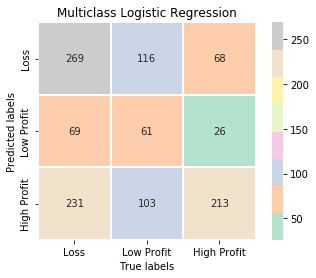

In [13]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 2.1.2) Decision Tree Classifier

In [14]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.005, 'min_samples_split': 0.1}
DTC Train score: 0.5408011869436202
DTC Test score: 0.5216262975778547


Text(0.5, 1, 'Decision Tree Classifier')

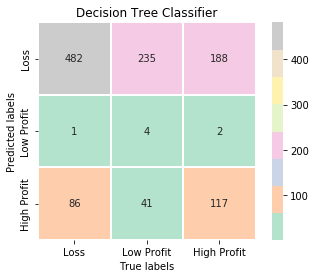

In [15]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 2.1.3) Random Forest Classifier

In [16]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 100}
RFC Train score: 1.0
RFC Test score: 0.5190311418685121


Text(0.5, 1, 'Random Forest Classifier')

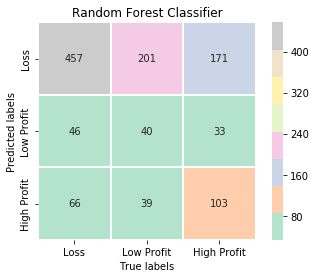

In [17]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 2.1.4) KNN Classifier

In [18]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [19]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5326409495548962
KNN Test score: 0.5069204152249135


Text(0.5, 1, 'KNN Classifier')

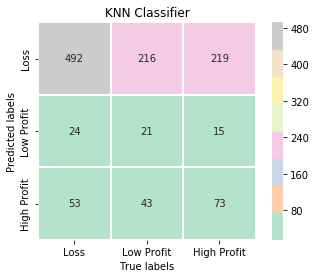

In [20]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 2.1.5) Gaussian Naive Bayes Classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.3538575667655786
GNB Test score: 0.3313148788927336


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

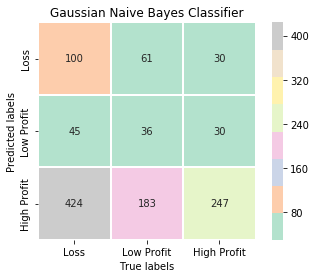

In [22]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 2.2) Seperating into 2 classes

In [23]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1957
0    1895
Name: gross_budget_ratio, dtype: int64

In [24]:
df22 = df2.copy()
df22['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [25]:
X = df22.drop(columns=['gross_budget_ratio'])
y = df22['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2696, 28)
Dimensionality of X_test : (1156, 28)
Dimensionality of y_train: (2696,)
Dimensionality of y_test : (1156,)


### 2.2.1) Logistic Regression

In [26]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = linear_model.LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))

LR best parameters: {'C': 100, 'penalty': 'l1'}
LR Train score: 0.6235163204747775
LR Test score: 0.6141868512110726


Text(0.5, 1, 'Logistic Regression')

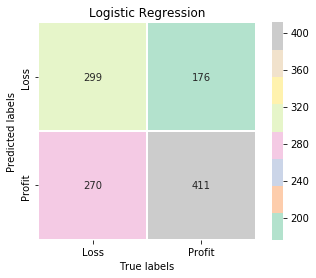

In [27]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 2.2.2) Decision Tree Classifier

In [28]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.005, 'min_samples_split': 0.1}
DTC Train score: 0.6238872403560831
DTC Test score: 0.583044982698962


Text(0.5, 1, 'Decision Tree Classifier')

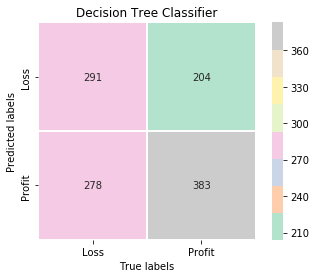

In [29]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 2.2.3) Random Forest Classifier

In [30]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.8649851632047477
RFC Test score: 0.6193771626297578


Text(0.5, 1, 'Random Forest Classifier')

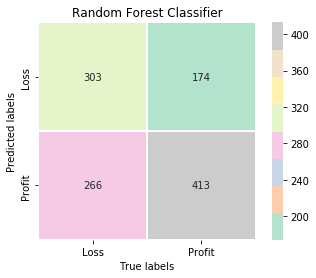

In [31]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 2.2.4) KNN Classifier

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.6242581602373887
KNN Test score: 0.5795847750865052


Text(0.5, 1, 'KNN Classifier')

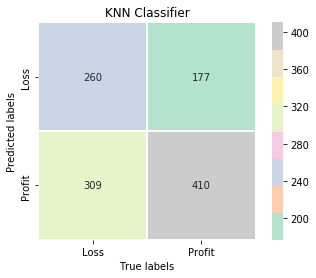

In [34]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 2.2.5) Gaussian Naive Bayes Classifier

In [35]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5081602373887241
GNB Test score: 0.5242214532871973


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

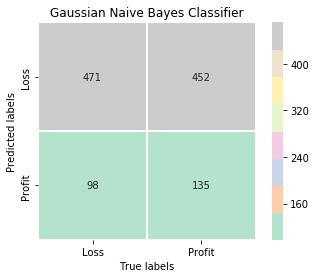

In [36]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')